# Introduction to sklearn

Today we'll start using the <a href="https://scikit-learn.org/stable/">scikit-learn</a> package. We'll start by exploring the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html">iris dataset</a>.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

This is a multi-class classification dataset, with four quantitative features for examples of three types of flowers.

In [2]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


The features and labels are both stored as numpy arrays.

In [3]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


Let's look at the target array.

In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Let's count the examples of each type.

In [5]:
print((iris.target == 0).sum())
print((iris.target == 1).sum())
print((iris.target == 2).sum())

50
50
50


Let's look at the first few examples. (Since the first 50 target values were all 0s, these must all be type 0 flowers.)

In [6]:
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Let's look at the last few examples. (Since the last 50 target values were all 2s, these must all be type 2 flowers.)

In [7]:
print(iris.data[-5:])

[[6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


Let's look at feature 2 across all examples.

In [8]:
print(iris.data[:,2])

[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]


It seems like this feature is larger on average for some types than others. Let's check.

In [9]:
print(iris.data[:50, 2].mean())
print(iris.data[50:100, 2].mean())
print(iris.data[100:, 2].mean())

1.4620000000000002
4.26
5.5520000000000005


Let's plot feature 2 against the target value.

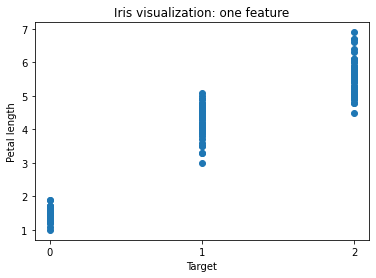

In [10]:
import matplotlib.pyplot as plt

plt.scatter(iris.target, iris.data[:, 2])
plt.title("Iris visualization: one feature")
plt.xlabel("Target")
plt.ylabel("Petal length")
plt.xticks([0, 1, 2])
plt.show()

Let's plot feature 3 against feature 2, color-coding the points by class.

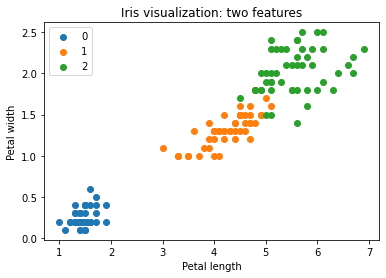

In [11]:
plt.scatter(iris.data[0:50,2], iris.data[0:50,3], label=0)
plt.scatter(iris.data[50:100,2], iris.data[50:100,3], label=1)
plt.scatter(iris.data[100:150,2], iris.data[100:150,3], label=2)
plt.title("Iris visualization: two features")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

The <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a> function makes it easy to split the data into a training set and a test set.

In [12]:
from sklearn.model_selection import train_test_split
data, test_data, target, test_target = train_test_split(iris.data, iris.target, test_size=0.2)

Let's fit a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">KNeighborsClassifier</a> to the training set and evaluate it on the test set.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(data, target)
accuracy = clf.score(test_data, test_target)
print(accuracy)

1.0


Standardization can be done with a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a>.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data = scaler.transform(data)
test_data = scaler.transform(test_data)

Let's check if standardization was important for this dataset.

In [15]:
clf = KNeighborsClassifier().fit(data, target)
accuracy = clf.score(test_data, test_target)
print(accuracy)

1.0
